In [102]:
#imports
import cv2 as opcv
import numpy as np
import matplotlib.pyplot as plt

In [103]:
#function to show images on notebook
#rgb/bgr
def imageShow(img):
    img = img[:,:,::-1]
    plt.imshow(img)

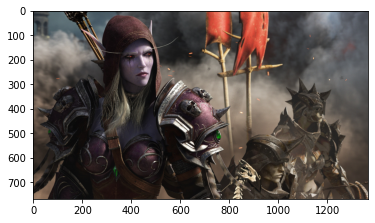

In [104]:
#setup
imgSylvanas = opcv.imread(r'img\sylvanas.jpg')
imageShow(imgSylvanas)

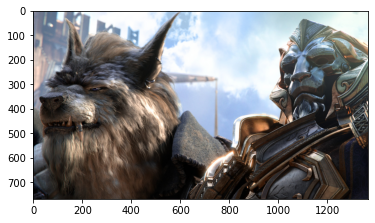

In [105]:
#setup
imgAnduin = opcv.imread(r'img\anduin.jpg')
imageShow(imgAnduin)

##(1) Crop and flip an image using Numpy array indexing.

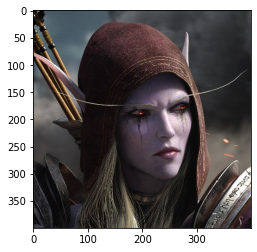

In [106]:
#cropping
sylvanasImageArr = np.array(imgSylvanas)
croppedSylvanas = sylvanasImageArr[0:400,200:600]
imageShow(croppedSylvanas)

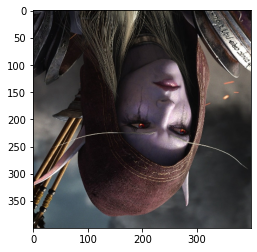

In [107]:
#flipping
flippedSylvanas = np.flipud(croppedSylvanas)
imageShow(flippedSylvanas)

##(2) Implement image translation using Numpy and OpenCV.

In [108]:
#setup
height, width, _ = imgSylvanas.shape
trsX, trsY = 200 , 200
trsMatrix = np.float32([[1, 0, trsX],[0, 1, trsY]])

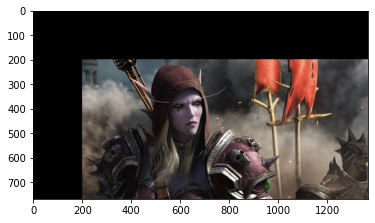

In [109]:
translatedSylvanas = opcv.warpAffine(imgSylvanas, trsMatrix ,(width,height))
imageShow(translatedSylvanas)

##(3) Implement image rotation using Numpy and OpenCV.

In [110]:
#setup
theta = 90
height, width, _ = imgSylvanas.shape
rotationMatrix = opcv.getRotationMatrix2D((width/2, height/2), theta, 0.5)

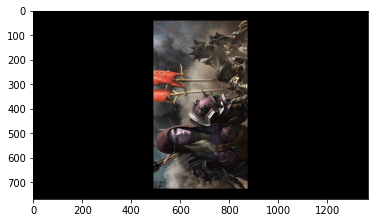

In [111]:
rotatedSylvanas = opcv.warpAffine(imgSylvanas, rotationMatrix,(width, height))
imageShow(rotatedSylvanas)

##(4) Implement image resizing using OpenCV.

In [112]:
#setup
newDimensionKeepingProportion = np.array([640,480]) #16:9
newDimension = np.array([500,500])

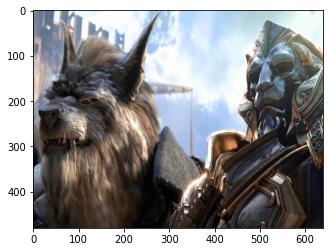

In [113]:
#KeepingProportion
resizedAnduin = opcv.resize(imgAnduin, newDimensionKeepingProportion)
imageShow(resizedAnduin)

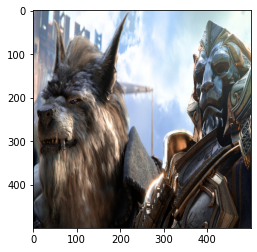

In [114]:
#Justresizing
resizedAnduin = opcv.resize(imgAnduin, newDimension)
imageShow(resizedAnduin)

##(5) Implement bitwise operations: AND, OR, XOR.

In [115]:
#Setup
sylvanasImageArr = np.array(imgSylvanas)
anduinImageArr = np.array(imgAnduin)

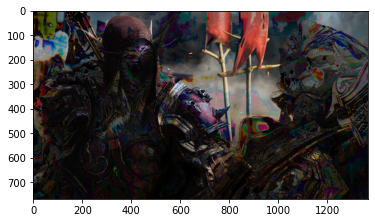

In [116]:
#AND
andImage = sylvanasImageArr & anduinImageArr
imageShow(andImage)

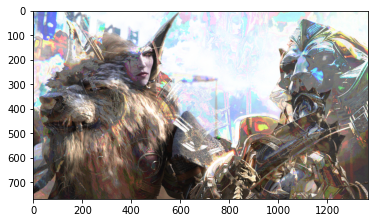

In [117]:
#OR
orImage = sylvanasImageArr | anduinImageArr
imageShow(orImage)

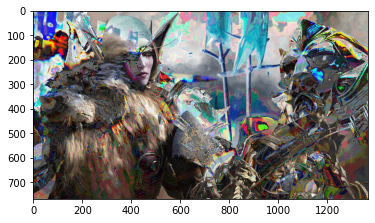

In [118]:
#XOR
xorImage = sylvanasImageArr ^ anduinImageArr
imageShow(xorImage)

##(6) Implement the "mask" operation, where a third image 'h' contains only a Region of Interest (ROI -- defined by the second image mask 'g') obtained from the input image 'f'. Note that this Region can be of any shape.

In [119]:
#getting the mask
mask = np.zeros(imgAnduin.shape, dtype="uint8")
mask = opcv.rectangle(mask, (0, 100), (600, 600), (255,255,255), -1)

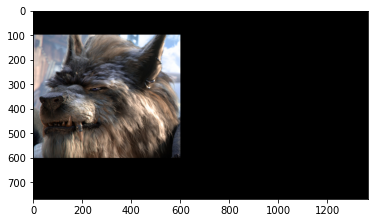

In [120]:
#masking
masked = imgAnduin & mask
imageShow(masked)